# Actividad M1 Actividad
Jesús Alexander Meister Careaga A01656699
Antonio Rafael Cedillo Rodríguez A01656823

Instalar mesa

In [ ]:
#Instalación de librerias (correr si es necesario)
#!pip install mesa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 119.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 125.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.1/107.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

Importar librerias

In [ ]:
import mesa
import random

Definimos agentes auxiliares (camino y obstaculo)

In [ ]:
class Camino(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

class Obstaculo(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)

Definimos clase Auto base, este se puede mover enfrente, enfrente-izquierda y enfrente-derecha. Si choca se detiene. Si detecta un choque cerca, baja su velocidad.

In [ ]:
class Auto(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.chocado = False
        self.contador = 1
        self.reduccionVelocidad = 1
        self.movimientos = 0
        self.velocidad = 0

    def validarPosicion(self, pos):
        noSalir = False
        noChocar = True
        x = pos[0]
        y = pos[1]

        if 0 <= x < self.model.ancho and 0 <= y < self.model.alto:
            noSalir = True

        if noSalir:
            celda = self.model.grid.get_cell_list_contents([(x,y)])
            for agente in celda:
                if not isinstance(agente, Camino):
                    noChocar = False

        if noChocar == False:
            rand = random.randint(1,100)
            prob = 1
            if rand <= prob:
                noChocar = True

        return noSalir and noChocar

    def sigMovimiento(self):
        x, y = self.pos
        movimientos = [(x, y+1), (x-1, y+1), (x+1, y+1)]
        movValidos = []
        for movimiento in movimientos:
            if self.validarPosicion(movimiento):
                movValidos.append(movimiento)

        return movValidos

    def step(self):

        if self.contador%self.reduccionVelocidad == 0:
            if self.chocado == False:
                movimientos = self.sigMovimiento()
                if len(movimientos) > 0:
                    pos = random.choice(movimientos)
                    self.model.grid.move_agent(self, pos)
                    self.movimientos += 1
                    self.velocidad = 1/self.reduccionVelocidad
                else:
                    self.velocidad = 0

                celda = self.model.grid.get_cell_list_contents([(self.pos)])
                n = 0
                for agente in celda:
                    if agente != self:
                        if not isinstance(agente, Camino):
                            self.chocado = True
                            agente.chocado = True
                            n += 1
                            vecinos = self.model.grid.get_neighbors(self.pos, True)
                            for vecino in vecinos:
                                if not isinstance(vecino, Camino) and not isinstance(vecino, Obstaculo):
                                    vecino.reduccionVelocidad += 1
                if n > 0:
                    self.model.choques += 1

                if self.pos[1] == self.model.alto-1:
                    self.model.schedule.remove(self)
                    self.model.grid.remove_agent(self)

                self.contador == 1

        self.contador += 1


Definimos clase Auto Habil, que puede girar de mejor manera, tiene más opciones de movimiento,por lo que puede girar completamente hacia la derecha o la izquierda

In [ ]:
class AutoHabil(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.chocado = False
        self.contador = 1
        self.reduccionVelocidad = 1
        self.movimientos = 0
        self.velocidad = 0

    def validarPosicion(self, pos):
        noSalir = False
        noChocar = True
        x = pos[0]
        y = pos[1]

        if 0 <= x < self.model.ancho and 0 <= y < self.model.alto:
            noSalir = True

        if noSalir:
            celda = self.model.grid.get_cell_list_contents([(x,y)])
            for agente in celda:
                if not isinstance(agente, Camino):
                    noChocar = False

        if noChocar == False:
            rand = random.randint(1,100)
            prob = 1
            if rand <= prob:
                noChocar = True

        return noSalir and noChocar

    def sigMovimiento(self):
        x, y = self.pos
        movimientos = [(x, y+1), (x-1, y+1), (x+1, y+1), (x+1, y), (x-1, y)]
        movValidos = []
        for movimiento in movimientos:
            if self.validarPosicion(movimiento):
                movValidos.append(movimiento)

        return movValidos

    def step(self):

        if self.contador%self.reduccionVelocidad == 0:
            if self.chocado == False:
                movimientos = self.sigMovimiento()
                if len(movimientos) > 0:
                    pos = random.choice(movimientos)
                    self.model.grid.move_agent(self, pos)
                    self.movimientos += 1
                    self.velocidad = 1/self.reduccionVelocidad
                else:
                    self.velocidad = 0

                celda = self.model.grid.get_cell_list_contents([(self.pos)])
                n = 0
                for agente in celda:
                    if agente != self:
                        if not isinstance(agente, Camino):
                            self.chocado = True
                            agente.chocado = True
                            n += 1
                            vecinos = self.model.grid.get_neighbors(self.pos, True)
                            for vecino in vecinos:
                                if not isinstance(vecino, Camino) and not isinstance(vecino, Obstaculo):
                                    vecino.reduccionVelocidad += 1
                if n > 0:
                    self.model.choques += 1

                if self.pos[1] == self.model.alto-1:
                    self.model.schedule.remove(self)
                    self.model.grid.remove_agent(self)

                self.contador == 1

        self.contador += 1


Definimos clase Auto Precavido, que reduce su velocidad si tiene muchos (3 o mas) obstaculos y/o autos a su alrededor y la aumenta si hay pocos o ninguno cerca


In [ ]:
class AutoPrecavido(mesa.Agent):
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.chocado = False
        self.contador = 1
        self.reduccionVelocidad = 1
        self.movimientos = 0
        self.velocidad = 0
        self.precaucion = False

    def validarPosicion(self, pos):
        noSalir = False
        noChocar = True
        x = pos[0]
        y = pos[1]

        if 0 <= x < self.model.ancho and 0 <= y < self.model.alto:
            noSalir = True

        if noSalir:
            celda = self.model.grid.get_cell_list_contents([(x,y)])
            for agente in celda:
                if not isinstance(agente, Camino):
                    noChocar = False

        if noChocar == False:
            rand = random.randint(1,100)
            prob = 1
            if rand <= prob:
                noChocar = True

        return noSalir and noChocar

    def sigMovimiento(self):
        x, y = self.pos
        movimientos = [(x, y+1), (x-1, y+1), (x+1, y+1)]
        movValidos = []
        for movimiento in movimientos:
            if self.validarPosicion(movimiento):
                movValidos.append(movimiento)

        return movValidos

    def revisarPrecaucion(self):
        vecinos = self.model.grid.get_neighbors(self.pos, True)
        n = 0
        for vecino in vecinos:
            if not isinstance(vecino, Camino):
                n += 1

        if n < 3:
            self.precaucion = False
        else:
            self.precaucion = True

    def step(self):

        self.revisarPrecaucion()

        if self.precaucion == False:
            if self.reduccionVelocidad > 1:
                self.reduccionVelocidad -= 1
            else:
                self.reduccionVelocidad += 1

        if self.contador%self.reduccionVelocidad == 0:
            if self.chocado == False:
                movimientos = self.sigMovimiento()
                if len(movimientos) > 0:
                    pos = random.choice(movimientos)
                    self.model.grid.move_agent(self, pos)
                    self.movimientos += 1
                    self.velocidad = 1/self.reduccionVelocidad
                else:
                    self.velocidad = 0

                celda = self.model.grid.get_cell_list_contents([(self.pos)])
                n = 0
                for agente in celda:
                    if agente != self:
                        if not isinstance(agente, Camino):
                            self.chocado = True
                            agente.chocado = True
                            n += 1
                            vecinos = self.model.grid.get_neighbors(self.pos, True)
                            for vecino in vecinos:
                                if not isinstance(vecino, Camino) and not isinstance(vecino, Obstaculo):
                                    vecino.reduccionVelocidad += 1
                if n > 0:
                    self.model.choques += 1

                if self.pos[1] == self.model.alto-1:
                    self.model.schedule.remove(self)
                    self.model.grid.remove_agent(self)

                self.contador == 1

        self.contador += 1


Definimos nuestro modelo de Ciudad, esta conciste en caminos y obstaculos, los coches deben recorrer desde abajo hasta arriba.

In [ ]:
class Ciudad(mesa.Model):
    def __init__(self, ancho, alto, tipoDeAuto):
        self.schedule = mesa.time.RandomActivation(self)
        self.grid = mesa.space.MultiGrid(ancho, alto, False)
        self.running = True
        self.tipoDeAuto = tipoDeAuto
        self.ancho = ancho
        self.alto = alto
        self.choques = 0
        self.choquesT = 0
        self.movimientos = 0
        self.velocidadPromedio = 0
        self.sumaVelocidadesPromedio = 0
        self.velocidadPromedioTotal = 0
        self.contador = 0

        self.datacollector = mesa.DataCollector(
            model_reporters={"Choques": "choquesT", "Movimientos":"movimientos", "VelocidadPromedio":"velocidadPromedio", "VelocidadPromedioTotal":"velocidadPromedioTotal"}
        )

        posiciones = [(x,y) for x in range(ancho) for y in range(1, alto-1)]
        n = 0

        for pos in posiciones:
            rand = random.randint(1,100)
            prob = 10
            if rand <= prob:
                a = Obstaculo(n, self)
            else:
                a = Camino(n, self)
            n += 1
            self.grid.place_agent(a, pos)

        for i in range(ancho):
            if self.tipoDeAuto == 0:
                a = Auto(n, self)
            elif self.tipoDeAuto == 1:
                a = AutoHabil(n, self)
            elif self.tipoDeAuto == 2:
                a = AutoPrecavido(n, self)
            elif self.tipoDeAuto == 4:
                rand = random.randint(1,75)
                if 0 < rand <= 25:
                    a = Auto(n, self)
                elif 25 < rand <= 50:
                    a = AutoHabil(n, self)
                elif 50 < rand <= 75:
                    a = AutoPrecavido(n, self)

            n += 1
            self.schedule.add(a)
            self.grid.place_agent(a, (i, 0))

    def step(self) :
        self.schedule.step()

        if self.choques > 0:
            self.choquesT += self.choques
            for agente in self.schedule.agents:
                if isinstance(agente, Auto) or isinstance(agente, AutoHabil) or isinstance(agente, AutoPrecavido):
                    agente.reduccionVelocidad += 0
            self.choques = 0

        autosNoChocados = 0
        velocidad = 0
        for agente in self.schedule.agents:
            if isinstance(agente, Auto) or isinstance(agente, AutoHabil) or isinstance(agente, AutoPrecavido):
                self.movimientos += agente.movimientos
                agente.movimientos = 0
                if agente.chocado == False:
                    autosNoChocados += 1
                    velocidad += agente.velocidad

        if autosNoChocados == 0:
            self.running = False
        else:
            velocidad = velocidad/autosNoChocados

        self.velocidadPromedio = velocidad
        if velocidad != 0:
            self.sumaVelocidadesPromedio += velocidad
            self.contador += 1
            self.velocidadPromedioTotal = self.sumaVelocidadesPromedio/self.contador


        self.datacollector.collect(self)

Usamos Batchrun para correr 1000 veces una simulacion de 40 coches recorriendo un camino de 100 casillas, en cada Batchrun se usa un tipo de coche diferente
Al final, se grafican los resultados obtenidos

In [ ]:
from matplotlib import pyplot as plt

from mesa import batchrunner
iteraciones = 1000
ancho = 40
alto = 100

parametros = {"ancho": ancho,
              "alto": alto, "tipoDeAuto": 0}
br = batchrunner.batch_run(Ciudad, parametros, iterations=iteraciones)
dictNormal = {'ChoquesPromedio':0, 'MovimientosPromedio':0, 'VelocidadPromedio':0}
promedioChoques = 0
promedioMovimientos = 0
promedioVelocidad = 0
for i in br:
    promedioChoques += i['Choques']
    promedioMovimientos += i['Movimientos']
    promedioVelocidad += i['VelocidadPromedioTotal']
promedioChoques = promedioChoques/iteraciones
promedioMovimientos = promedioMovimientos/iteraciones
promedioVelocidad = promedioVelocidad/iteraciones
dictNormal['ChoquesPromedio'] = promedioChoques
dictNormal['MovimientosPromedio'] = promedioMovimientos
dictNormal['VelocidadPromedio'] = promedioVelocidad
print("Auto normal:")
print(dictNormal)


parametros = {"ancho": ancho,
              "alto": alto, "tipoDeAuto": 1}
br = batchrunner.batch_run(Ciudad, parametros, iterations=iteraciones)
dictHabil = {'ChoquesPromedio':0, 'MovimientosPromedio':0, 'VelocidadPromedio':0}
promedioChoques = 0
promedioMovimientos = 0
promedioVelocidad = 0
for i in br:
    promedioChoques += i['Choques']
    promedioMovimientos += i['Movimientos']
    promedioVelocidad += i['VelocidadPromedioTotal']
promedioChoques = promedioChoques/iteraciones
promedioMovimientos = promedioMovimientos/iteraciones
promedioVelocidad = promedioVelocidad/iteraciones
dictHabil['ChoquesPromedio'] = promedioChoques
dictHabil['MovimientosPromedio'] = promedioMovimientos
dictHabil['VelocidadPromedio'] = promedioVelocidad
print("Auto habil:")
print(dictHabil)

parametros = {"ancho": ancho,
              "alto": alto, "tipoDeAuto": 2}
br = batchrunner.batch_run(Ciudad, parametros, iterations=iteraciones)
dictPrecavido = {'ChoquesPromedio':0, 'MovimientosPromedio':0, 'VelocidadPromedio':0}
promedioChoques = 0
promedioMovimientos = 0
promedioVelocidad = 0
for i in br:
    promedioChoques += i['Choques']
    promedioMovimientos += i['Movimientos']
    promedioVelocidad += i['VelocidadPromedioTotal']
promedioChoques = promedioChoques/iteraciones
promedioMovimientos = promedioMovimientos/iteraciones
promedioVelocidad = promedioVelocidad/iteraciones
dictPrecavido['ChoquesPromedio'] = promedioChoques
dictPrecavido['MovimientosPromedio'] = promedioMovimientos
dictPrecavido['VelocidadPromedio'] = promedioVelocidad
print("Auto precavido:")
print(dictPrecavido)

  0%|          | 0/1000 [00:00<?, ?it/s]

Auto normal:
{'ChoquesPromedio': 11.391, 'MovimientosPromedio': 2953.658, 'VelocidadPromedio': 0.6601155750137524}


  0%|          | 0/1000 [00:00<?, ?it/s]

Auto habil:
{'ChoquesPromedio': 9.994, 'MovimientosPromedio': 5212.07, 'VelocidadPromedio': 0.7389495441090308}


  0%|          | 0/1000 [00:00<?, ?it/s]

Auto precavido:
{'ChoquesPromedio': 8.953, 'MovimientosPromedio': 3266.731, 'VelocidadPromedio': 0.8404628125954946}


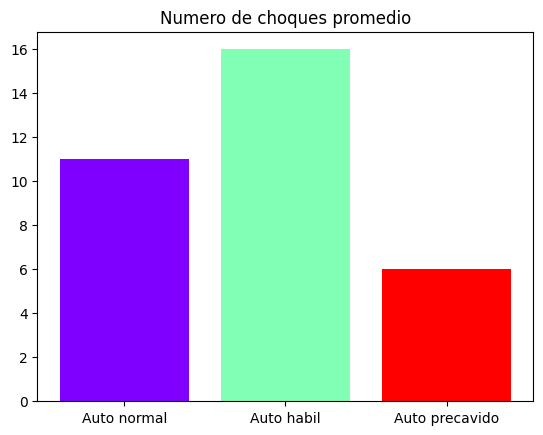

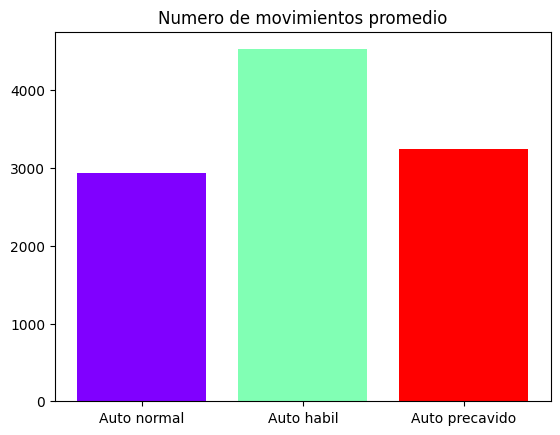

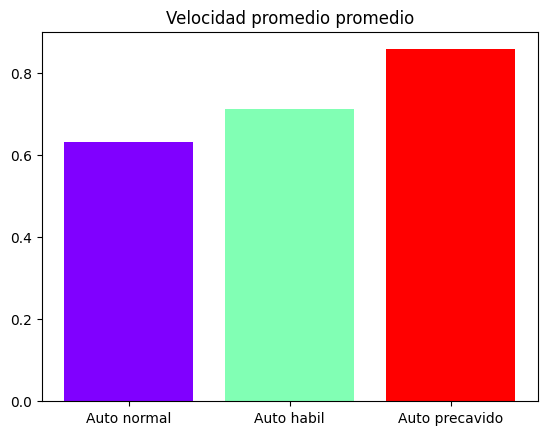

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nombres = ["Auto normal", "Auto habil", "Auto precavido"]
diccionarios = [dictNormal, dictHabil, dictPrecavido]

choques = []
velocidadPromedio = []
movimientos = []

for diccionario in diccionarios:
    choques.append(diccionario['ChoquesPromedio'])
    movimientos.append(diccionario['MovimientosPromedio'])
    velocidadPromedio.append(diccionario['VelocidadPromedio'])


plt.bar(nombres, choques, color=plt.cm.rainbow(np.linspace(0, 1, len(nombres))))
plt.title("Numero de choques promedio")
plt.show()

plt.bar(nombres, movimientos, color=plt.cm.rainbow(np.linspace(0, 1, len(nombres))))
plt.title("Numero de movimientos promedio")
plt.show()

plt.bar(nombres, velocidadPromedio, color=plt.cm.rainbow(np.linspace(0, 1, len(nombres))))
plt.title("Velocidad promedio")
plt.show()

 el servidor para visualizar la simulación del modelo.
**Nota: Si el servidor se c**

In [ ]:
from mesa.visualization.modules import CanvasGrid, ChartModule
from mesa.visualization.ModularVisualization import ModularServer
import nest_asyncio
nest_asyncio.apply()

def agent_portrayal(agent):

    if isinstance(agent, Camino):
        portrayal = {"Shape": "rect",
                     "Filled": "true",
                     "Layer": 0,
                     "Color": "gray",
                     "w": 1,
                     "h": 1}

    elif isinstance(agent, Obstaculo):
        portrayal = {"Shape": "rect",
                     "Filled": "true",
                     "Layer": 0,
                     "Color": "red",
                     "w": 0.89,
                     "h": 0.89}

    elif isinstance(agent, Auto):
        portrayal = {"Shape": "circle",
                     "Filled": "false",
                     "Layer": 0,
                     "Color": "orange",
                     "r": 0.5}
        if agent.chocado == True:
            portrayal["Color"] = "blue"

    elif isinstance(agent, AutoHabil):
        portrayal = {"Shape": "circle",
                     "Filled": "false",
                     "Layer": 0,
                     "Color": "green",
                     "r": 0.5}
        if agent.chocado == True:
            portrayal["Color"] = "blue"

    elif isinstance(agent, AutoPrecavido):
        portrayal = {"Shape": "circle",
                     "Filled": "false",
                     "Layer": 0,
                     "Color": "pink",
                     "r": 0.5}
        if agent.chocado == True:
            portrayal["Color"] = "blue"

    return portrayal

width = 20
height = 100
grid = CanvasGrid(agent_portrayal, width, height, width*width, height*height)
parametros = {"ancho":width, "alto":height, "tipoDeAuto":2}
chart = ChartModule([{"Label": "VelocidadPromedioTotal", "Color": "Black"}],
                    data_collector_name='datacollector')
chart1 = ChartModule([{"Label": "Choques", "Color": "Black"}],
                    data_collector_name='datacollector')

server = ModularServer(Ciudad,
                       [grid, chart, chart1],
                       "Modelo de Ciudad",
                       parametros)

server.launch()

Interface starting at http://127.0.0.1:8521
